Bağımsız örneklem t testi: "Bağımsız iki grupun ortalamaları arasında anlamlı bir fark var mı?"
    Sorusuna yanıt verir

In [2]:
import pandas as pd
df = pd.read_csv("ProfSalaries.csv")
df.head(3)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750


In [6]:
#Unnamed: 0' dan kurtulalım.
df.drop(columns='Unnamed: 0', inplace=True);

In [7]:
df.info() #veriye bir bakış;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [8]:
df.isnull().sum() #eksik değerler var mı diye bir bakış;

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [9]:
#Şimdi, bu içerikte anlamaya çalıtığımız şey Dummy Variables olduğundan, olabildiğince basite indirgemek için kategorik değişkenler olan sex, rank ve discipline dışındaki değişkenleri sileceğim;
df.drop(["yrs.since.phd","yrs.service"],axis="columns",inplace=True)

In [10]:
y=df["salary"]
X=df.drop(["salary"],axis="columns")
X.head(3)

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male


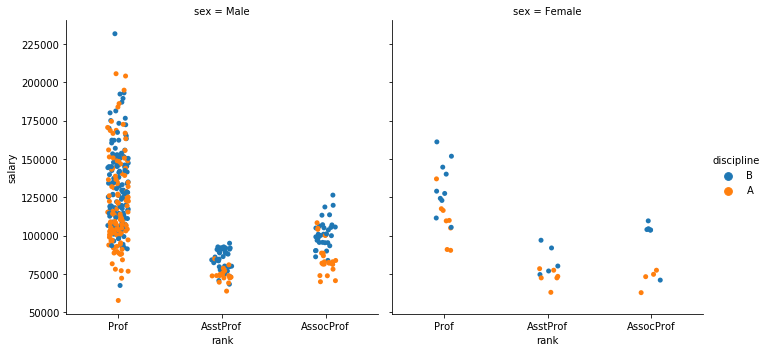

In [11]:

import seaborn as sns 
sns.catplot(data=df, y="salary", x="rank", hue="discipline", col="sex")

Örneğin bu grafiklere bakarak disciplin-A ve disciplin-B kategorilerinin kazançları arasında
discipline-B lehine anlamlı bir fark olabileceğini düşünebiliriz. Çünkü mavi noktalar üstte daha çok yoğunlaşmış gibi duruyor.
-Rank(rütbele) ya da sex(cinsiyet) kategorik değiskenleri ve kazanç arasında da ilişki olabilir. Ama ben burada A ve B disiplinleri ile Salary(kazanç) arasında anlamlı bir fark var mı ona bakmak istiyorum. 

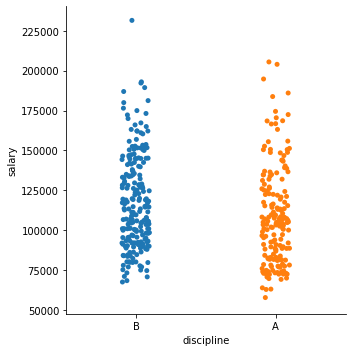

In [15]:
# Catplot ve boxplot grafiklerine de bir bakalım;
sns.catplot(data=df, x="discipline", y="salary")

In [ ]:
# Catplot grafiğine bakarak kazançlar arasında fark olup olmadığını alamak zor görünüyor.

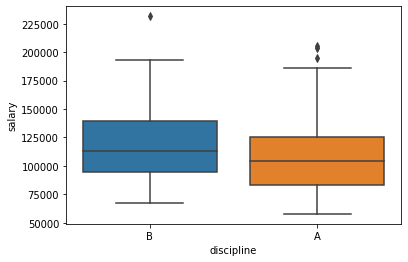

In [20]:
sns.boxplot(x = "discipline", y = "salary", data = df);

In [18]:
#Boxplot grafiğinde ise salary-b nin yaklaşık 95-135 arası, salary-A'nın 80-120 arası kazandığını görüyoruz.

Şimdi, Bağımsız 2 örneklem t testimizi yapabiliriz. 
Ama bundan önce, bağımsız 2 örneklem t testimizin 2 varsayımı vardır. Normallik ve **normal dağılım** varsayımı ve **varyansların homojenliği** varsayımları. 

Eğer bu her iki varsayım da dağlanırsa parametrik hipotez testi, iki varsayımdan biri bile sağlanmazsa nan-parametrik hipotez testi yapılır.

**1-) Normallik Varsayımı**

**H0:**
Verilerin dağılımı ile normal dağılım arasında farklılık yoktur. Yani verimiz normal dağılıma sahiptir

**H1:** 
Verilerin dağılımı ile normal dağılım arasında farklılık vardır.Yani verimiz normal dağılıma sahip değildir.
    p-value 0.05' den küçük ise H0 hipotezi reddedilir. Değil ise reddedilir.

    


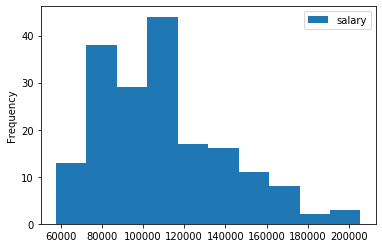

In [3]:
# Grafiğe bir göz atarak normallik adına çıkarımda bulunabiliriz.
pd.DataFrame(df[df.discipline=="A"].salary).plot.hist();

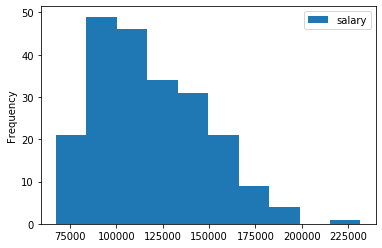

In [4]:
pd.DataFrame(df[df.discipline=="B"].salary).plot.hist();

#### Normal dağılmıyor gibi görünüyor, Shapiro-Winlk normallik testimizi uygulayıp bakalım;

In [44]:
from scipy.stats import shapiro
test_ista, pvaluea=shapiro(df[df.discipline=="A"].salary)
print('TTest = %.4f, p-değeri = %.7f' % (test_ista, pvaluea))
test_ist_B, pvalue_B=shapiro(df[df.discipline=="B"].salary)
print('TTest = %.4f, p-değeri = %.7f' % (test_ist_B, pvalue_B))

TTest = 0.9418, p-değeri = 0.0000010
TTest = 0.9612, p-değeri = 0.0000127


**Karar:** p değeri α= 0.05(genel oalrak kabul gören hata oranı) değerinden küçük olması sebebiyle yokluk hipotezi(H0) reddedilir.

**Yorum:** H0 yokluk hipotezi reddedildiği için, verilerin normal dağılıma sahip olmadığını söyleriz. Bu durumda nan-Prametrik hipotez testi yapmalıyız.

**2- Varyansların homojenliği varsayımı**

**H0:** Varyanslar eşittir. Varyansalr arasında bir fark yoktur.

**H1:** Varyanslar eşit değildir

In [60]:
import scipy.stats as stats
stats.levene(df[df.discipline=="A"].salary,df[df.discipline=="B"].salary )

LeveneResult(statistic=0.04584598611596387, pvalue=0.8305664927796936)

**Karar:** p değeri α= 0.05(genel oalrak kabul gören hata oranı) değerinden büyük olması sebebiyle yokluk(varysanslar arasında bir fark yoktur) hipotezi(H0) reddedilemez.

**Yorum:** H0 yokluk hipotezi reddedilemediği için, verilerin eşit varyansa sahip olduğunu söyleriz. 

Yani varyans homojenliği varsayımımız sağlanıyor. Yine de normallik varsayımımız sağlanmadığından nan-parametrik hipotez testimizi yapacağız.

### Şimdi nan-parametrik hipotez testimizi gerçekleştirelim. 

**2- Varyansların homojenliği varsayımı**

**H0:** İki kategorik değiskenlerin kazancları(salary) arasında anlamlı bir fark yoktur.

**H1:** İki kategorik değiskenlerin kazancları(salary) arasında anlamlı bir fark vardır.

In [67]:
stats.mannwhitneyu(df[df.discipline=="A"].salary,df[df.discipline=="B"].salary)

MannwhitneyuResult(statistic=15710.0, pvalue=0.00037581275662523084)

**Karar:** p değeri α= 0.05(genel oalrak kabul gören hata oranı) değerinden küçük olması sebebiyle yokluk(salaryler arasında anlamlı bir fark yoktur) hipotezi(H0) reddedilir.

**Yorum:** H0 yokluk hipotezi reddedildiği için, iki kazanç(salary) arasında anlamlı bir fark olduğu yorumunu yapabiliriz.

## ---Discipline-A ve Discipline-B arasında Salarys açısından anlamlı bir fark vardır ve bu fark discipline-B lehinedir.---